# <center>EDA on TITANIC DATASET</ceneter>

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read dataset in pandas dataframe

train = pd.read_csv('titanic_train.csv')
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
train.shape

(891, 12)

### Missing Data

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


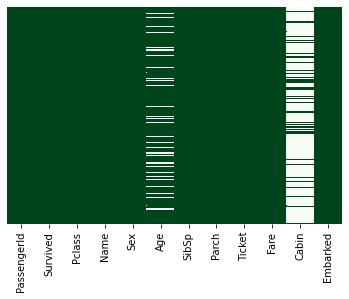

In [5]:
# heatmap

#sns.heatmap(train.isnull(), yticklabels=False
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Greens_r')
# null values can be seen in white color

In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### we can see...

1 = Survived <br>
0 = Not Survived

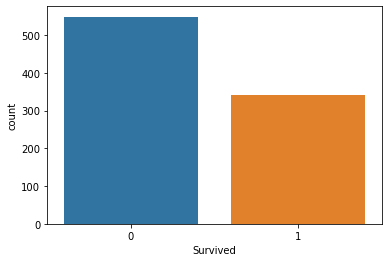

In [7]:
sns.countplot(x='Survived', data=train)

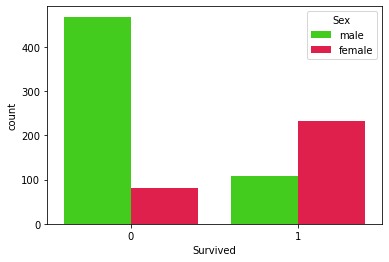

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='prism')

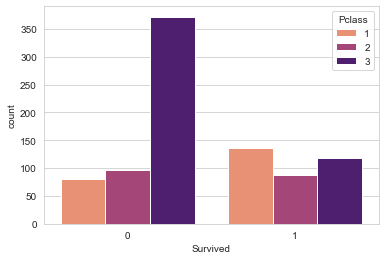

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data = train, palette='magma_r')

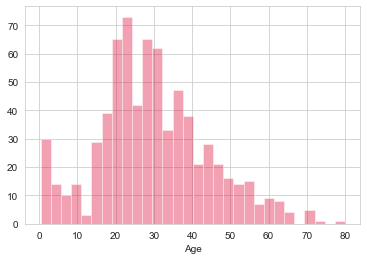

In [10]:
# see whether Age feature follows a normal distribution or not

# use distplot or histogram

#sns.distplot(train['Age'].dropna())

#kde = kernel density estimation

sns.distplot(train['Age'].dropna(), kde = False, color='crimson', bins=30)

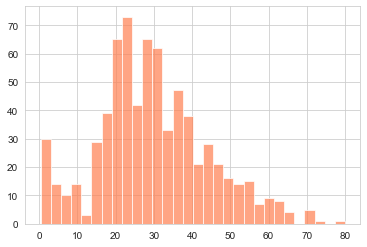

In [11]:
train['Age'].hist(bins=30, color = 'coral', alpha=0.7)

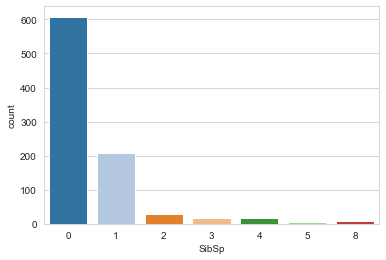

In [12]:
# countplot of siblings and spouse

sns.countplot(x='SibSp', data = train, palette='tab20')

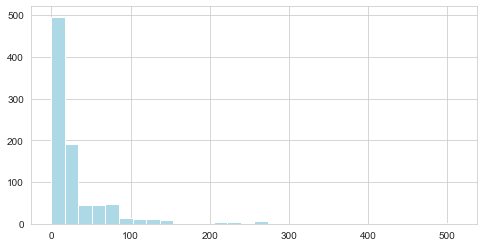

In [13]:
train['Fare'].hist(color='lightblue', bins=30, figsize=(8,4))

### Cufflinks

Cufflinks is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas. The library binds the power of Plotly with the flexibility of Pandas for easy plotting.

In [14]:
import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist', color='coral', bins=30)

### Data Cleaning

We've to fill missing data for Age instead of dropping rows with missing data.<br>
imputation = filling mean age of all the passengers<br><br>
We can check avg age by passenger class.

What is avg age of people w.r.t. passenger_class?

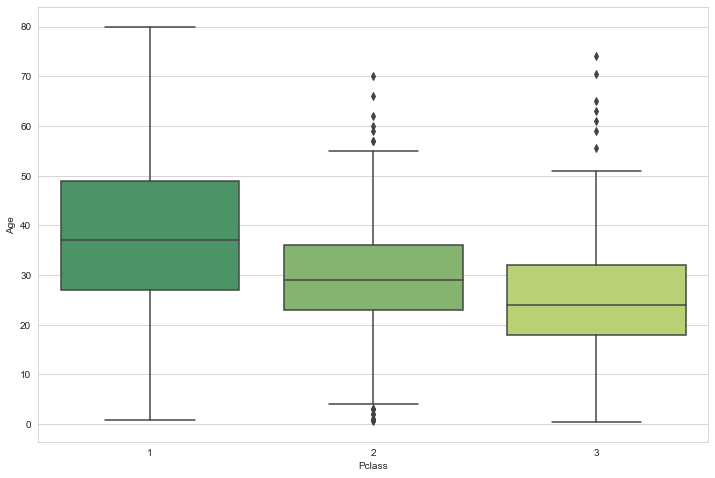

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', data=train, palette='summer')

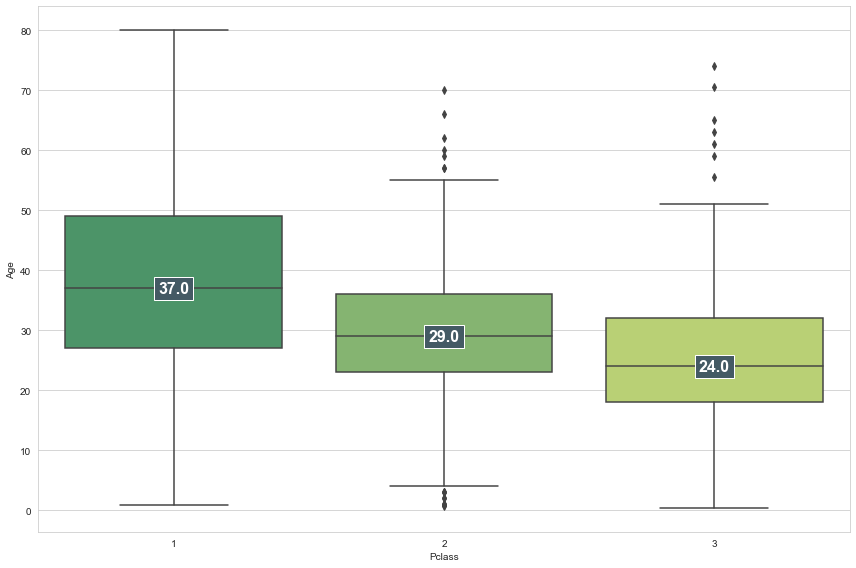

In [16]:
# lets annotate median values for boxplots

plt.figure(figsize=(12, 8))

box_plot = sns.boxplot(x='Pclass', y='Age', data=train, palette='summer')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=16,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

We can observe, people with higher age chooses higher class which makes sense. <br>
We can use these average/median values to impute at missing values for attribute Age. 

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
# apply that function

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [19]:
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    24.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

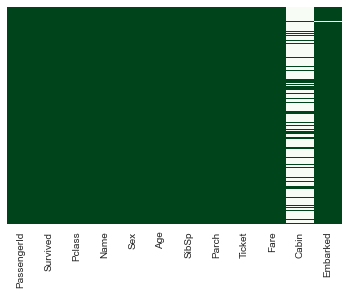

In [20]:
# check the heatmap again

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Greens_r')

Now we can see that there are so many null values in Cabin attribute. This require feature engineering.

In [21]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


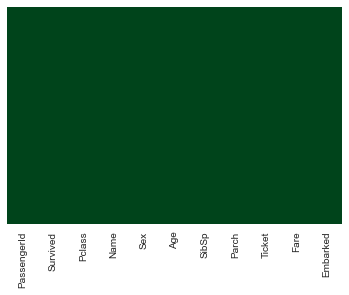

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Greens_r')

## Handling Categorical variables

we can convert categorical variables to dummy variables so that they can be considered as input by the machine.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 69.5+ KB


In [30]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
pd.get_dummies(train['Embarked'], drop_first=True)

# when drop_first is set tu True, it'll drop 1st column C from ['S', 'C', 'Q']

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [33]:
# now we don't need some columns anymore, let's remove them

train.drop(['Embarked', 'Sex', 'Name', 'Ticket'], axis=1, inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [35]:
train = pd.concat([train, embarked, sex], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [37]:
train.shape

(889, 10)

Now data is ready to feed in model !

# Building the Model - Logistic Regression

we've Survived column as our target variable while rest are independent variables.

Splitting data into train and test set (I'm using train file only for both train and test data.)

In [41]:
# train test split

X = train.drop('Survived', axis=1)
y = train['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Training the model

In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=600)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=600)

# Predicting

In [46]:
pred = logreg.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(y_test, pred)

In [48]:
accuracy

array([[137,  23],
       [ 34,  73]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, pred)
acc_score

0.7865168539325843

In [56]:
type(y_test)

pandas.core.series.Series

In [57]:
type(pred)

numpy.ndarray

In [89]:
df = pd.DataFrame(columns = ['c1', 'c2'])
df['c1'] = pd.Series(y_test)

df['c2'] = pd.Series(pred)
print(df.shape)
df.head(20)

(267, 2)


,c1,c2
639,0,NaN
147,0,0.0
278,0,NaN
484,1,NaN
770,0,NaN
874,1,NaN
157,0,1.0
660,1,NaN
792,0,NaN
533,1,NaN
